### Author:----> Abhishek Kumar
### New Trending Project:---> Fever-Diagnosis-Anlysis-& Prediction- ML Project

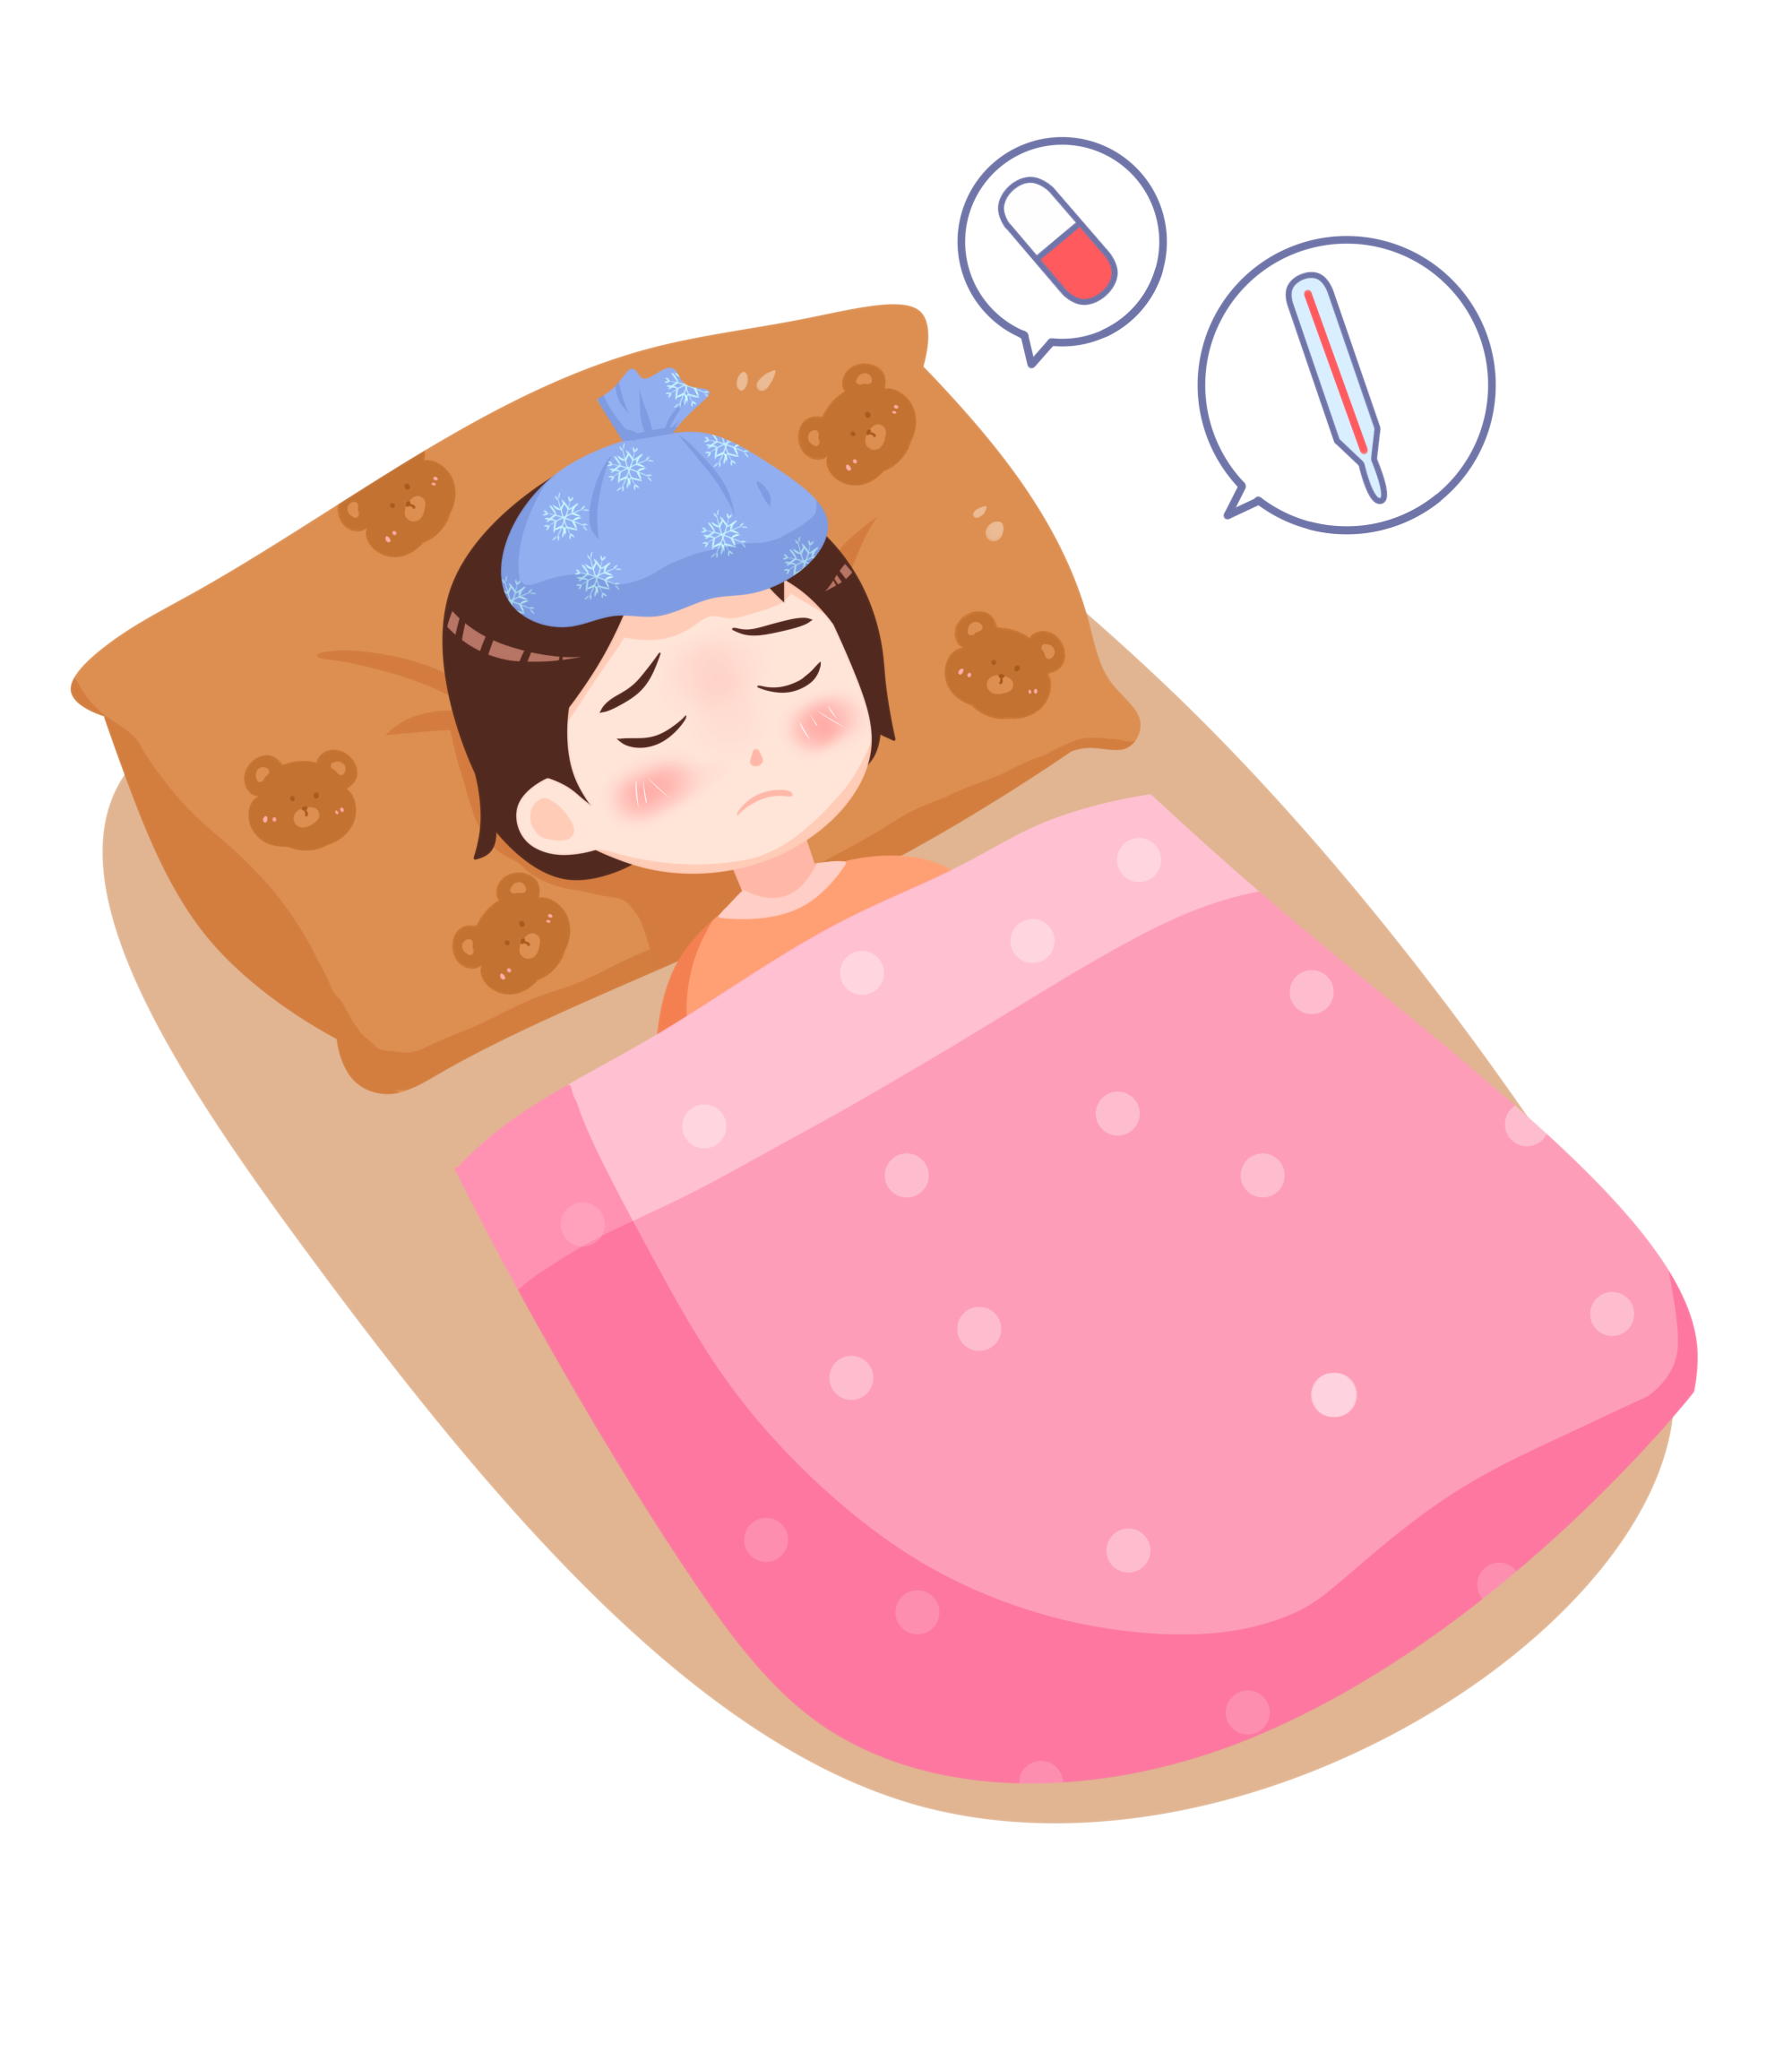

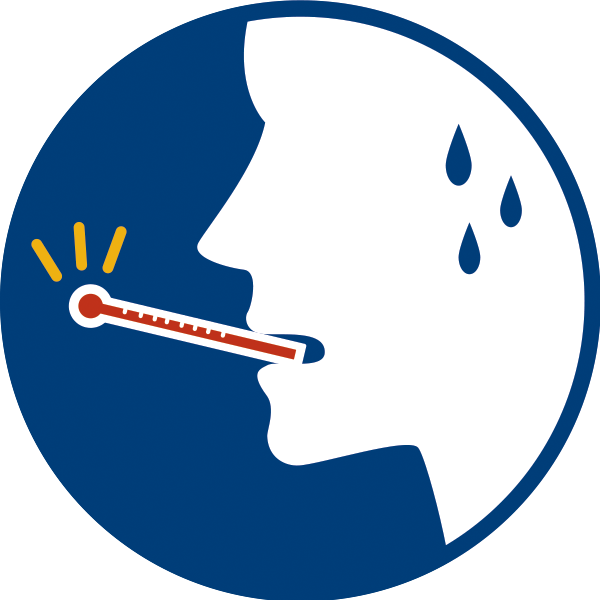

#### Project Overview:---
  A fever is diagnosed by measuring body temperature with a thermometer and performing a physical exam: 
Temperature
A fever is generally defined as an oral temperature of 100°F (37.8°C) or higher. The most accurate way to measure body temperature is rectally, but oral or ear thermometers are also commonly used. Forehead thermometers are less accurate, but doctors may use them to screen for fever. 
Physical exam
A doctor will perform a physical exam from head to toe to check for signs of infection or disease. They may also ask questions about your symptoms, medical history, medications, and recent travel. 
Additional tests
Depending on your medical history and physical exam, a doctor may order additional tests, such as a blood test, urine test, or chest X-ray. They may also take a nasal or throat sample to test for respiratory infections. 
A fever can be caused by many things, including infections, heat exhaustion, medications, vaccines, and autoimmune conditions. Other symptoms that may accompany a fever include:
Sweating
Chills and shivering
Headache
Muscle aches
Loss of appetite
Irritability
Dehydration 

#### Step1:----> Import All the important Library

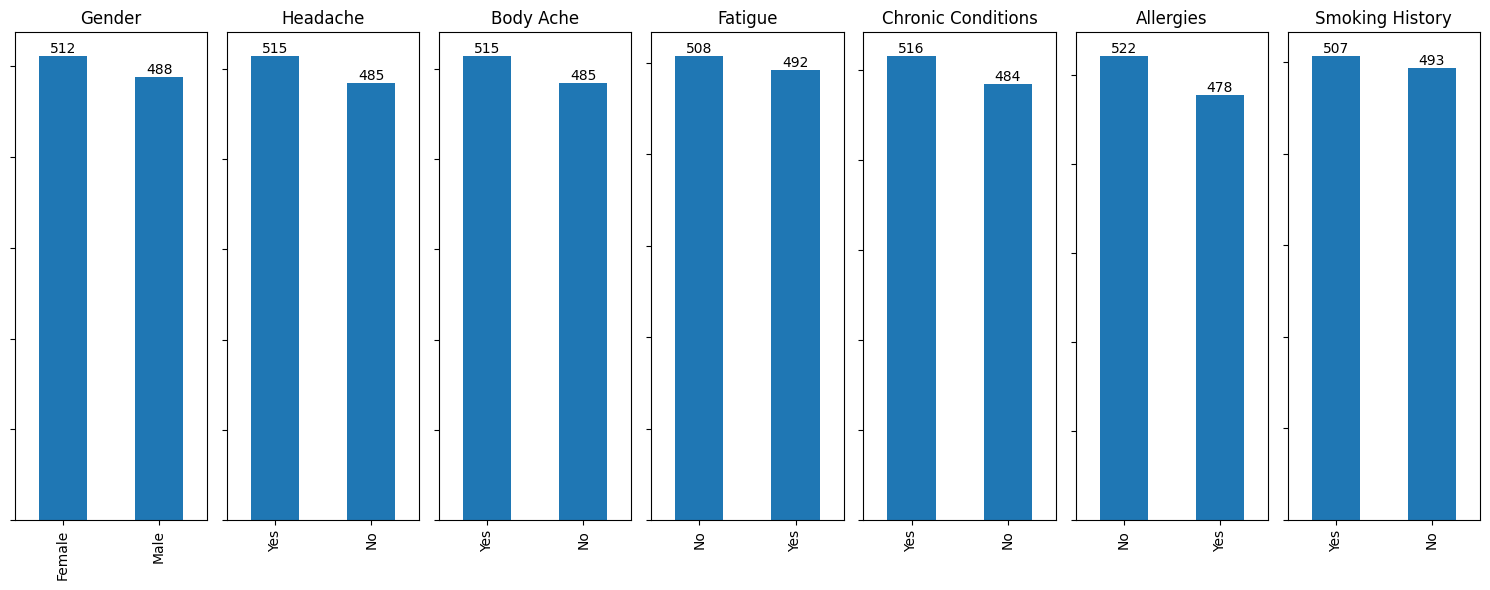

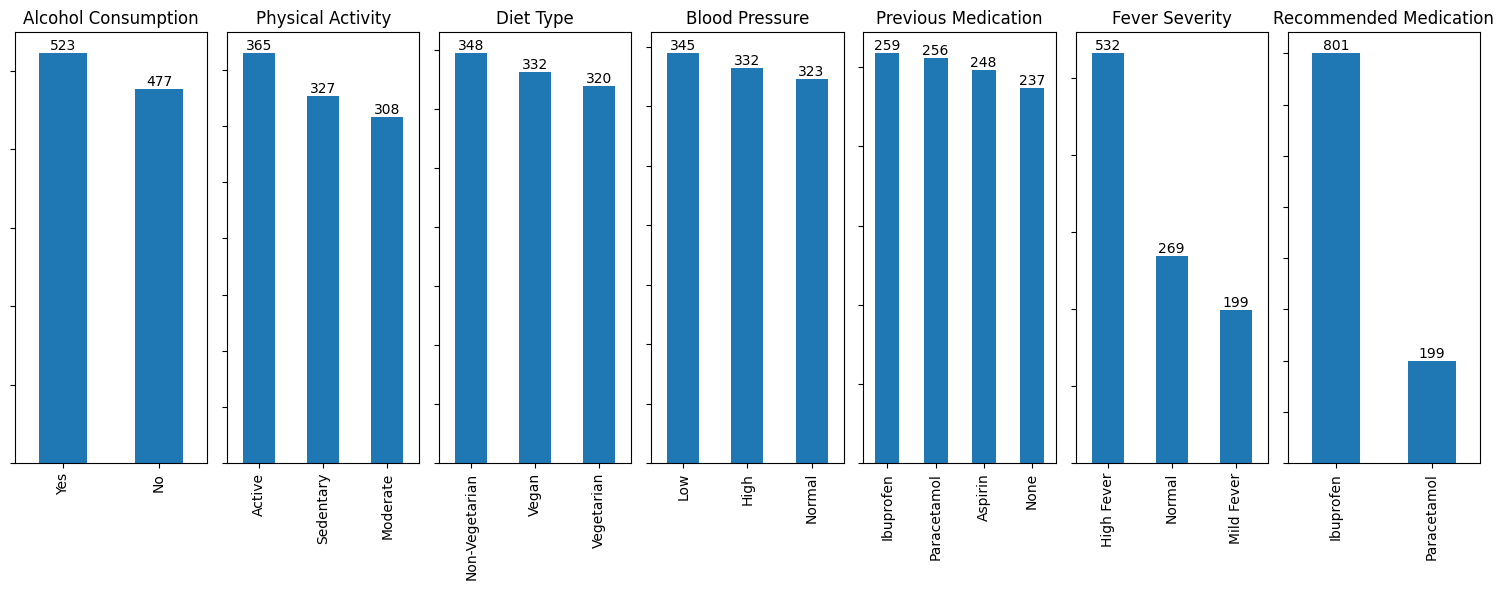

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from IPython.core.display import display, HTML


def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, label_type=location, rotation=rotation)
    axes.set_yticklabels(())
    axes.set_xlabel("")
    axes.set_ylabel("")
    
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
lgr = LogisticRegression()
svc = SVC()
xgb = XGBClassifier()
lgb = LGBMClassifier(verbose=-100)

models = [rfc, etc, gbc, abc,
         lgr, svc, xgb, lgb]

names = ["Random Forest", "Extra Trees", "Gradient Boosting", "Ada Boosting",
        "Logistic Regression", "Support vector machine", "XGBoost", "LightGBM"]

def training():
    scores, reports, cms = [], dict(), dict()
    
    for i, j in zip(models, names):
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        scores += [accuracy_score(pred, y_test)*100]
        reports[j] = classification_report(pred, y_test)
        cms[j] = confusion_matrix(pred, y_test)
        
    dd = pd.DataFrame({"score": scores}, index=names)
    fig, axes = plt.subplots()
    dd = dd.sort_values("score", ascending=False)
    dd["score"] = round(dd["score"], 2)
    dd["score"].plot(kind="bar", ax=axes)
    bar_labels(axes)
    plt.tight_layout()
    plt.show()
    
    index = 0

    for _ in range(2):
        fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
        for i in range(4):
            sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=axes[i])
            axes[i].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
            index += 1
        plt.tight_layout()
        plt.show()
        
    for i in dd.index:
        print("*"*30)
        print(i)
        print(reports[i])
        print("\n\n")

df = pd.read_csv("/kaggle/input/fever-diagnosis-and-medicine-dataset/enhanced_fever_medicine_recommendation.csv")

cols = [i for i in df.columns if i not in ["Fever_Severity", "Recommended_Medication"]]

df = df[cols + ["Fever_Severity", "Recommended_Medication"]]

df["Previous_Medication"].fillna("None", inplace=True)

cats = [i for i in df.columns if df[i].nunique() <= 4]

nums = [i for i in df.columns if i not in cats]

index = 0

for _ in range(2):
    fig, axes = plt.subplots(ncols=7, figsize=(15, 6))
    for i in range(7):
        df[cats[index]].value_counts().plot(kind="bar", ax=axes[i])
        bar_labels(axes[i])
        axes[i].set_title(cats[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

# Patient attributes influence on fever severity

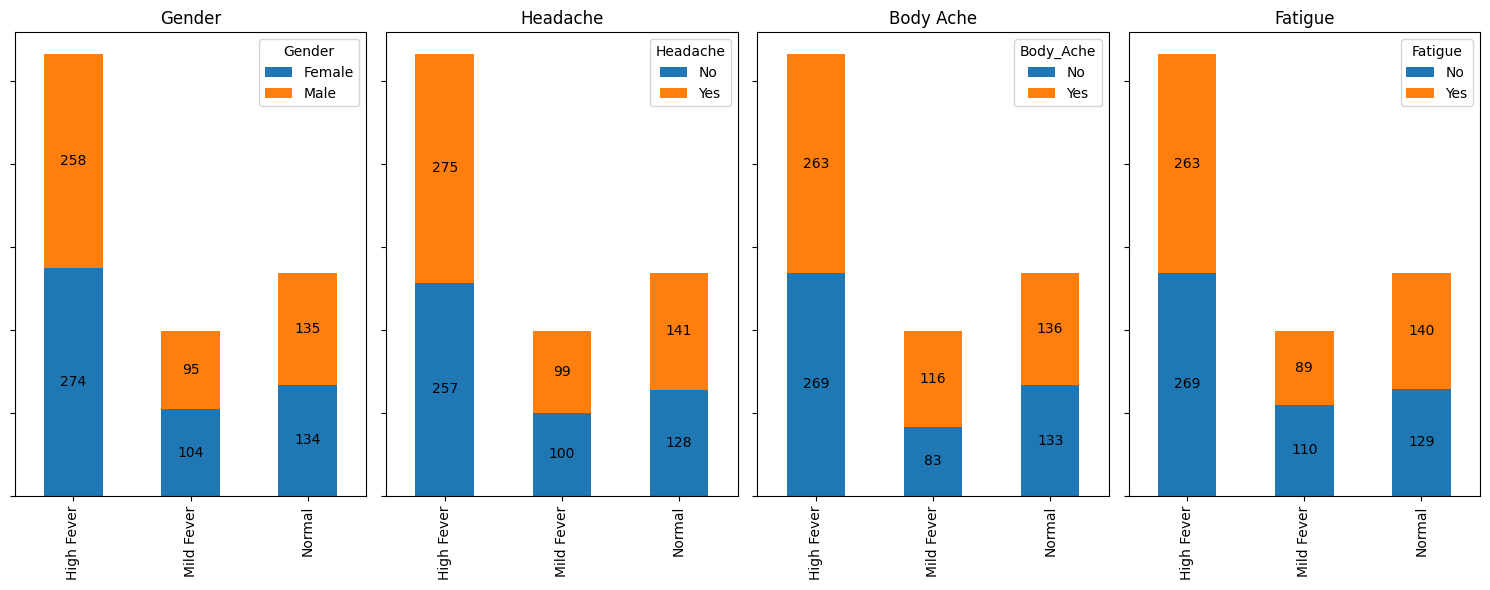

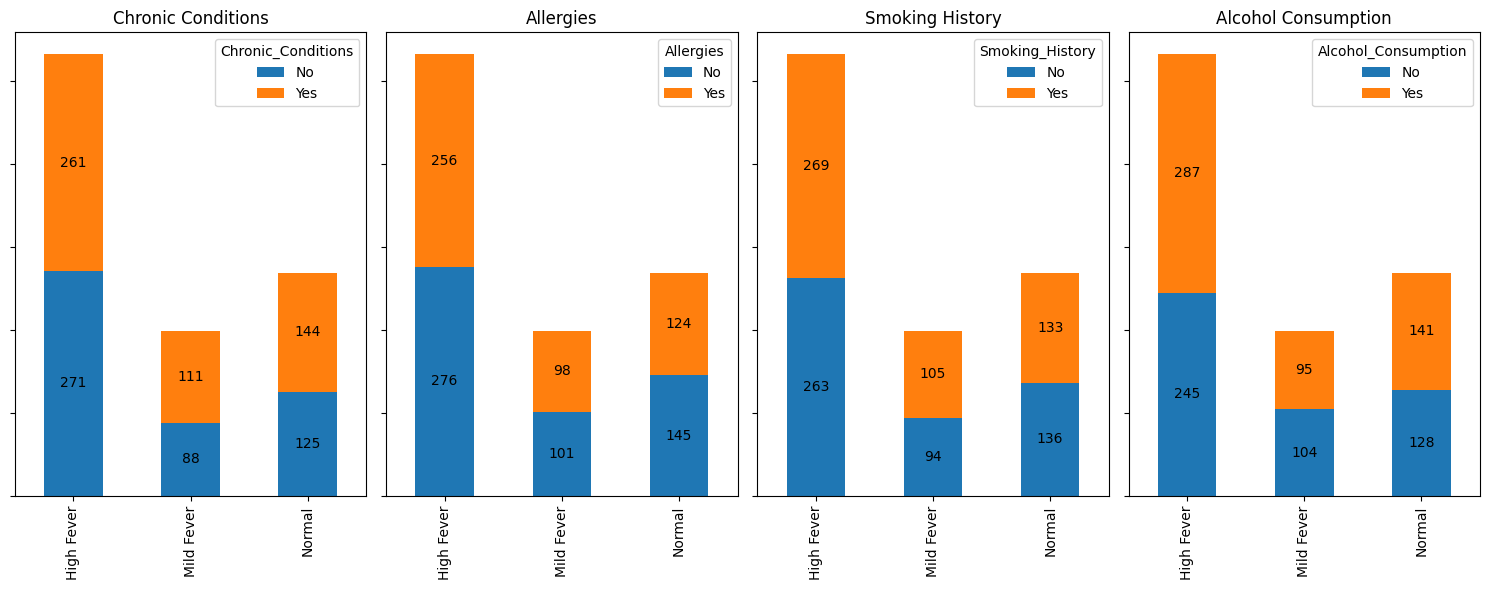

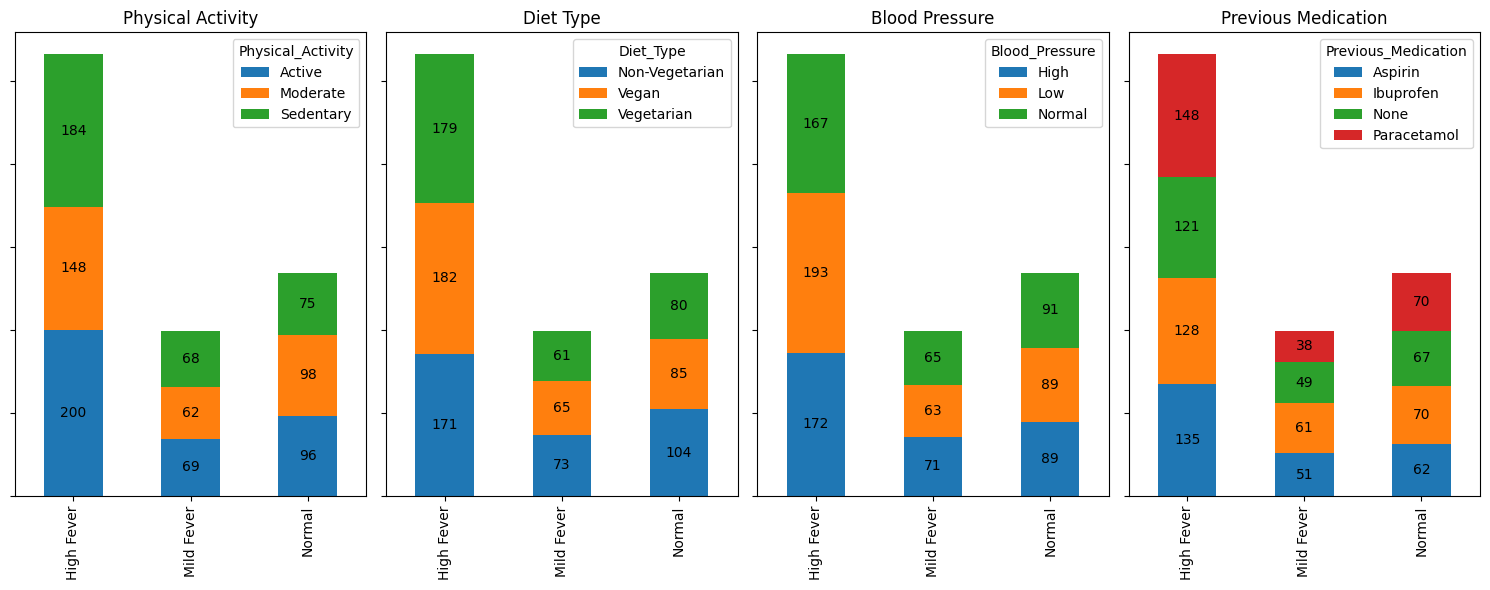

In [2]:
index = 0

for _ in range(3):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for i in range(4):
        df.groupby(cats[-2])[cats[index]].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[i])
        bar_labels(axes[i], 0, "center")
        axes[i].set_title(cats[index].replace("_", ' '))
        index += 1
    plt.tight_layout()
    plt.show()

# Prescriptions for patients with different fever severities

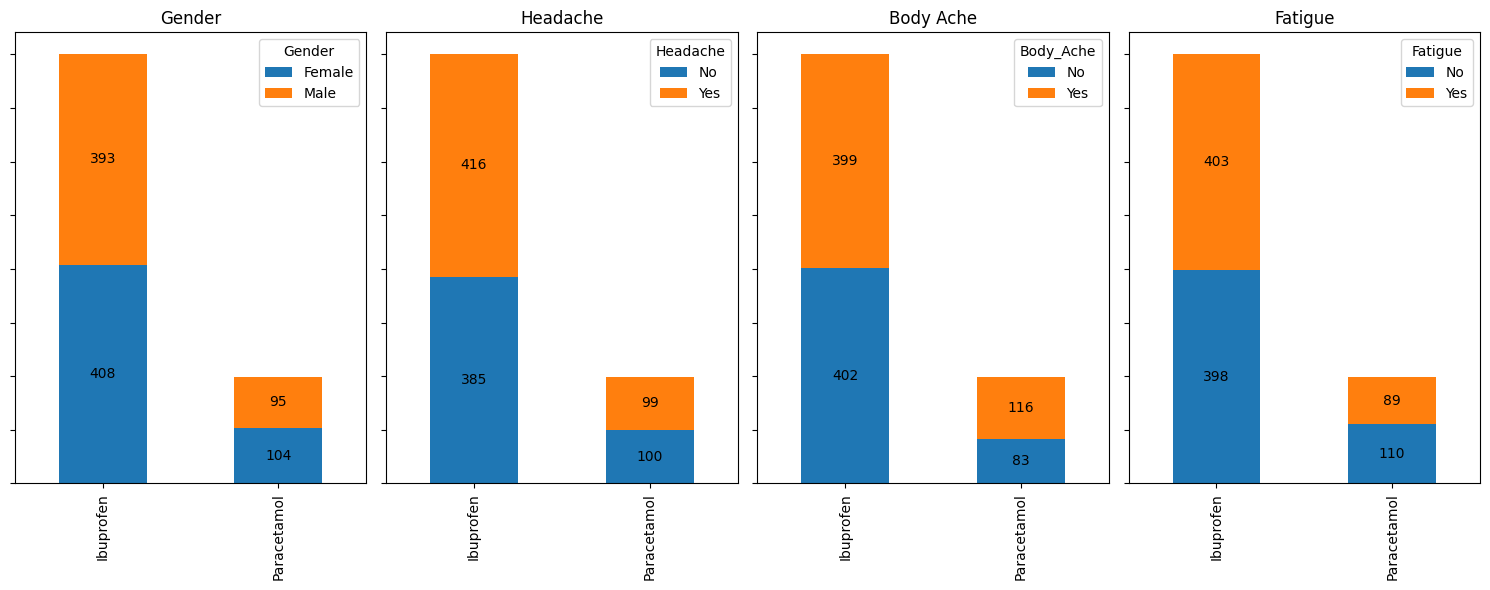

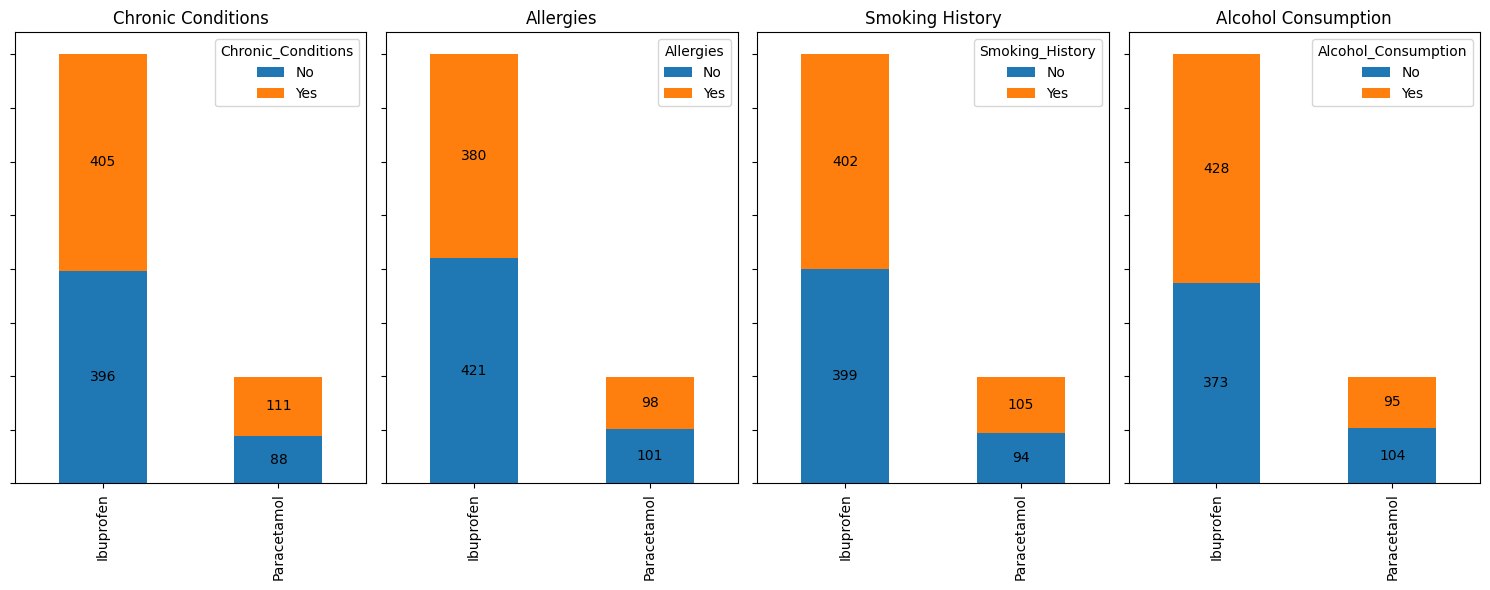

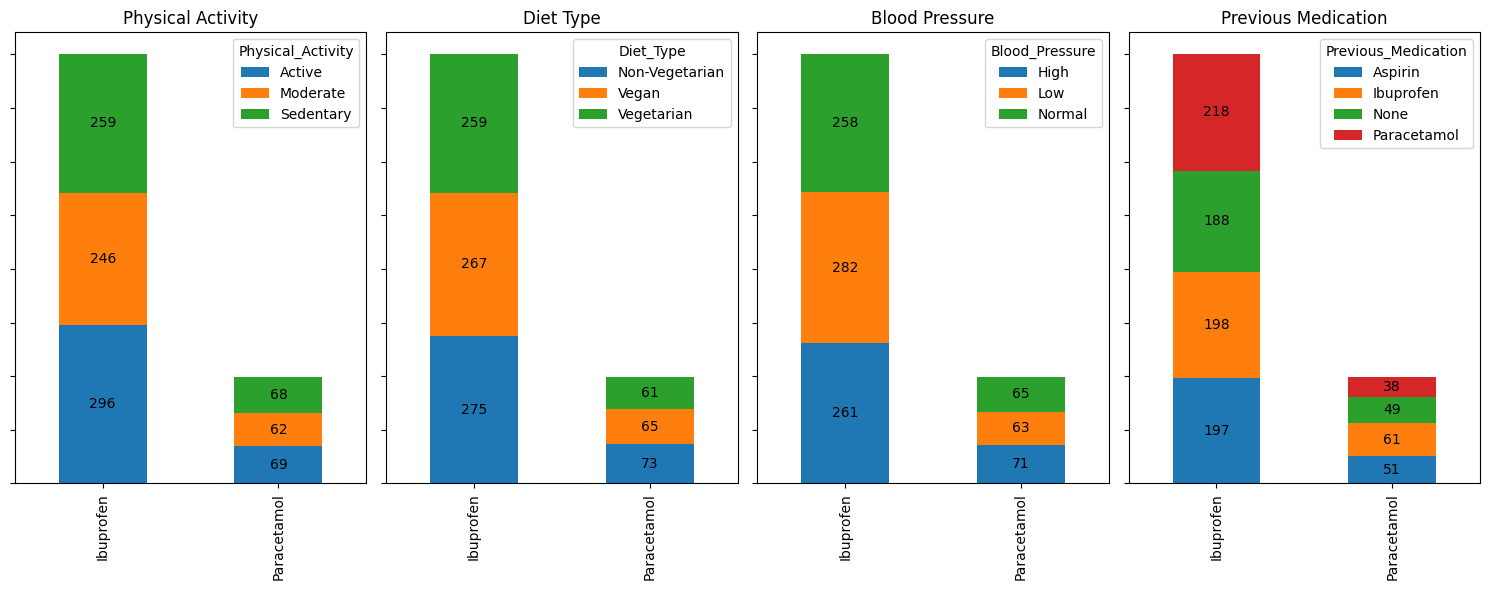

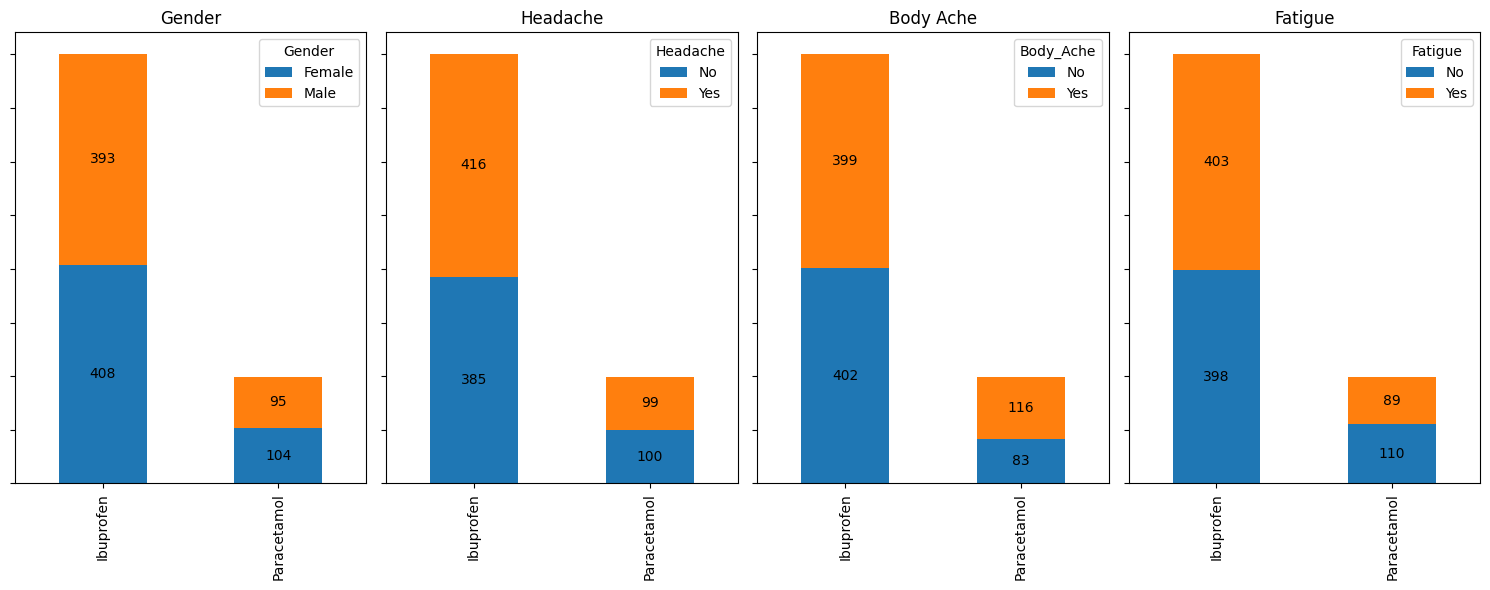

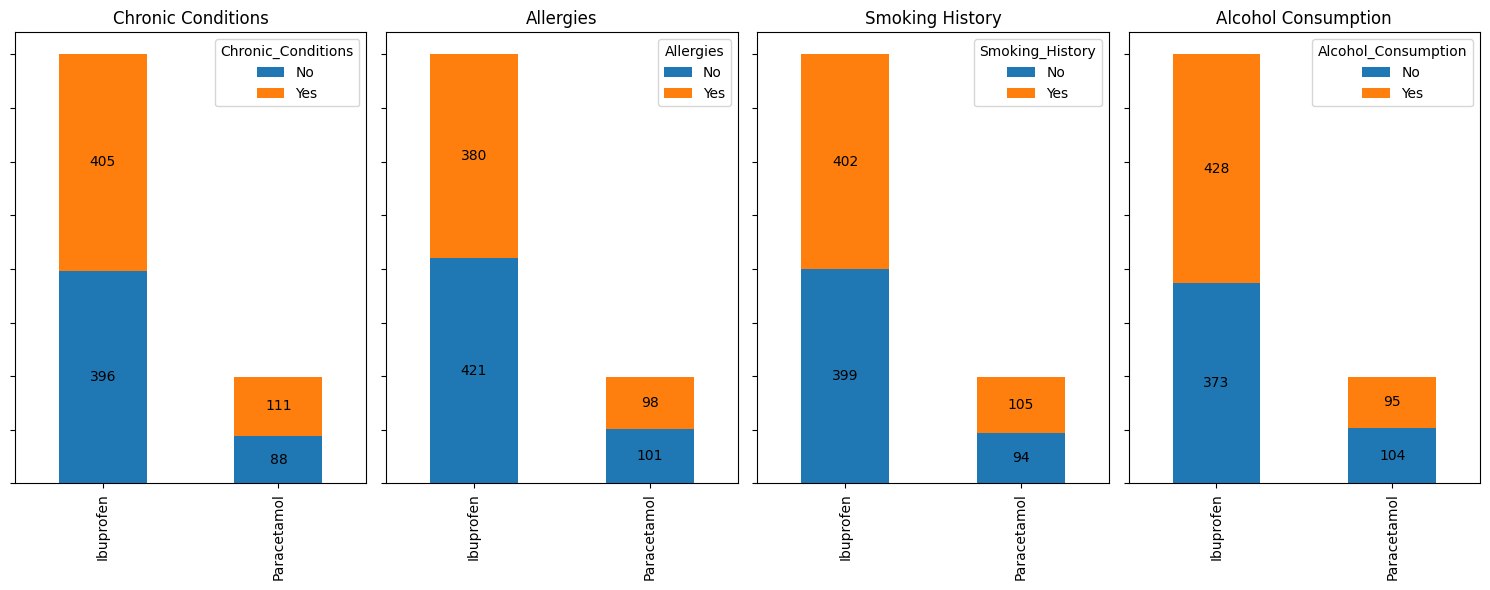

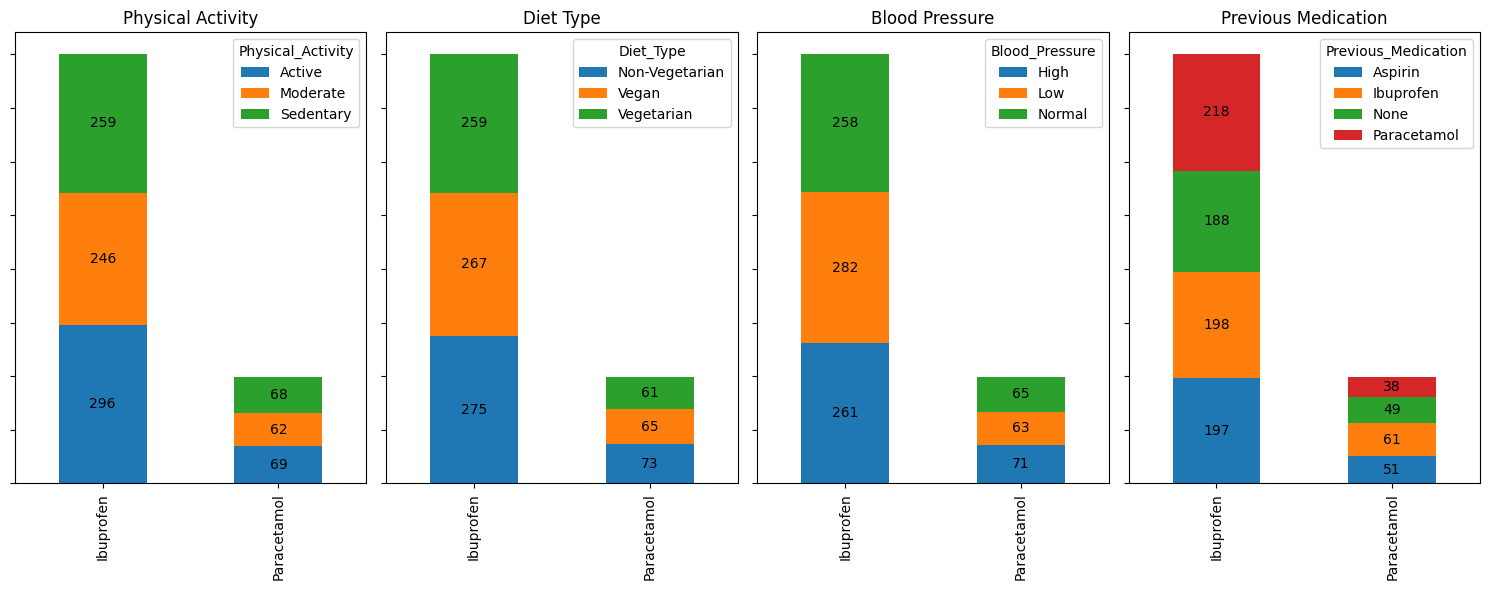

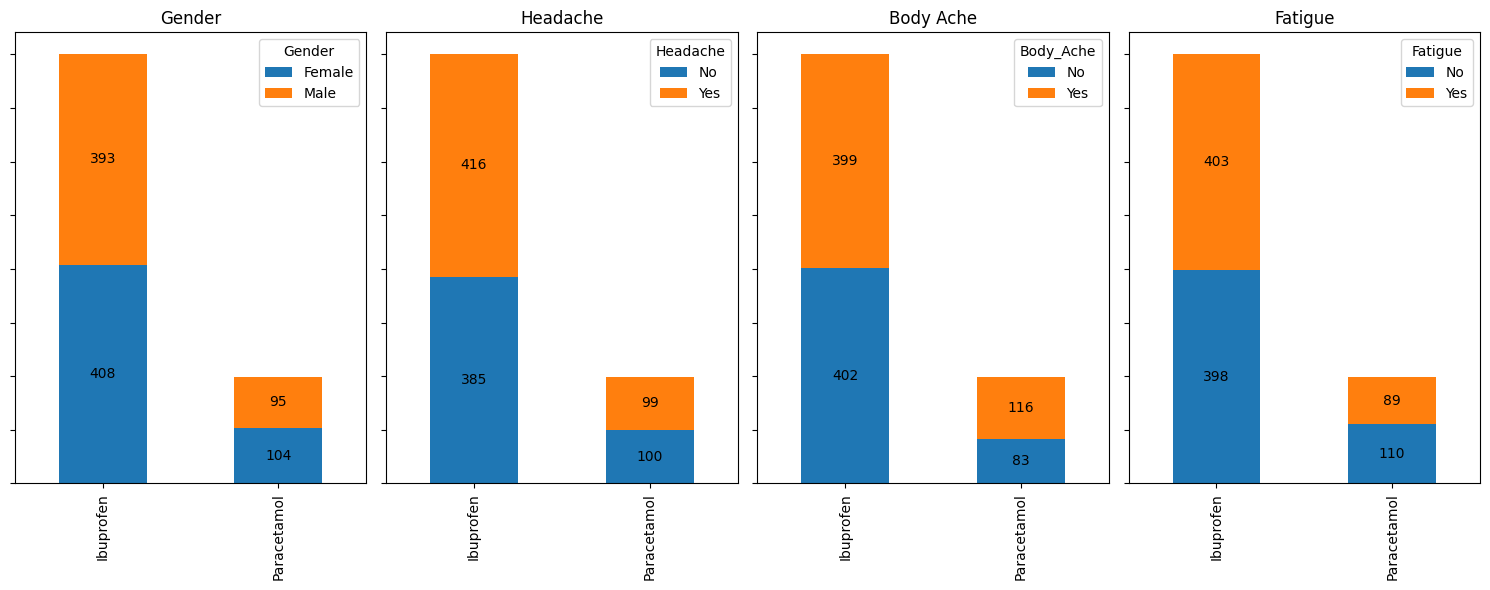

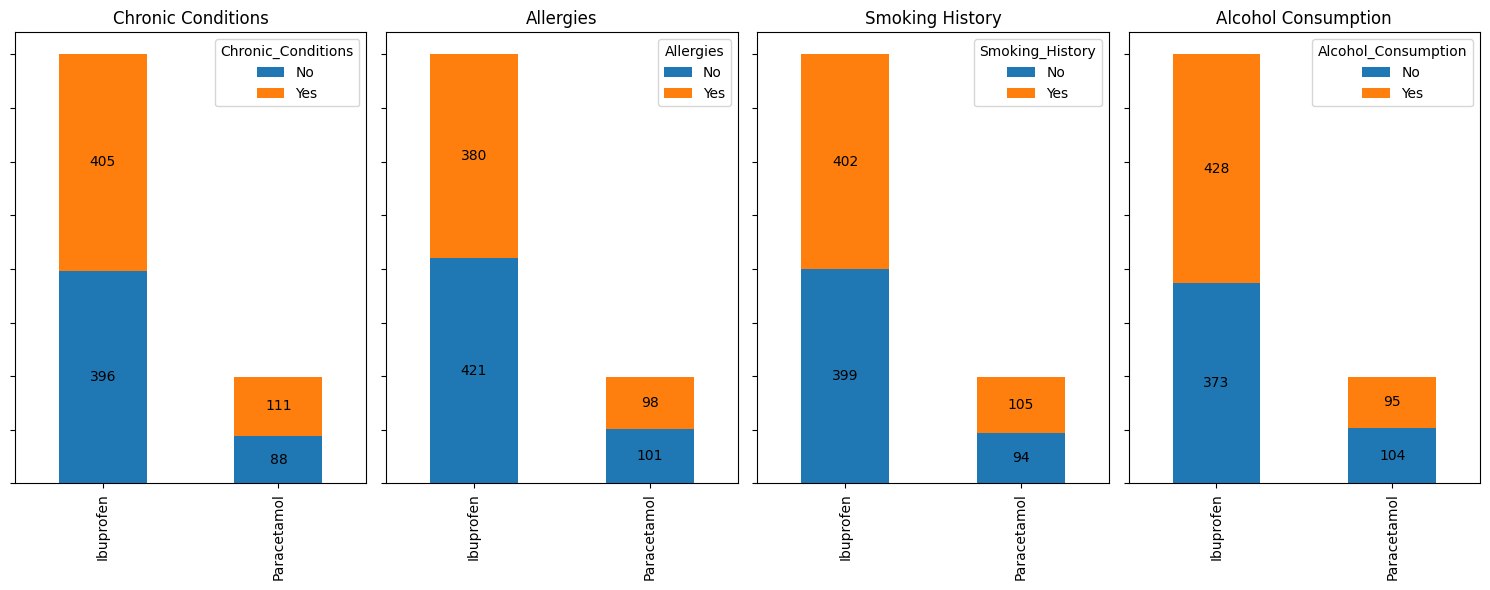

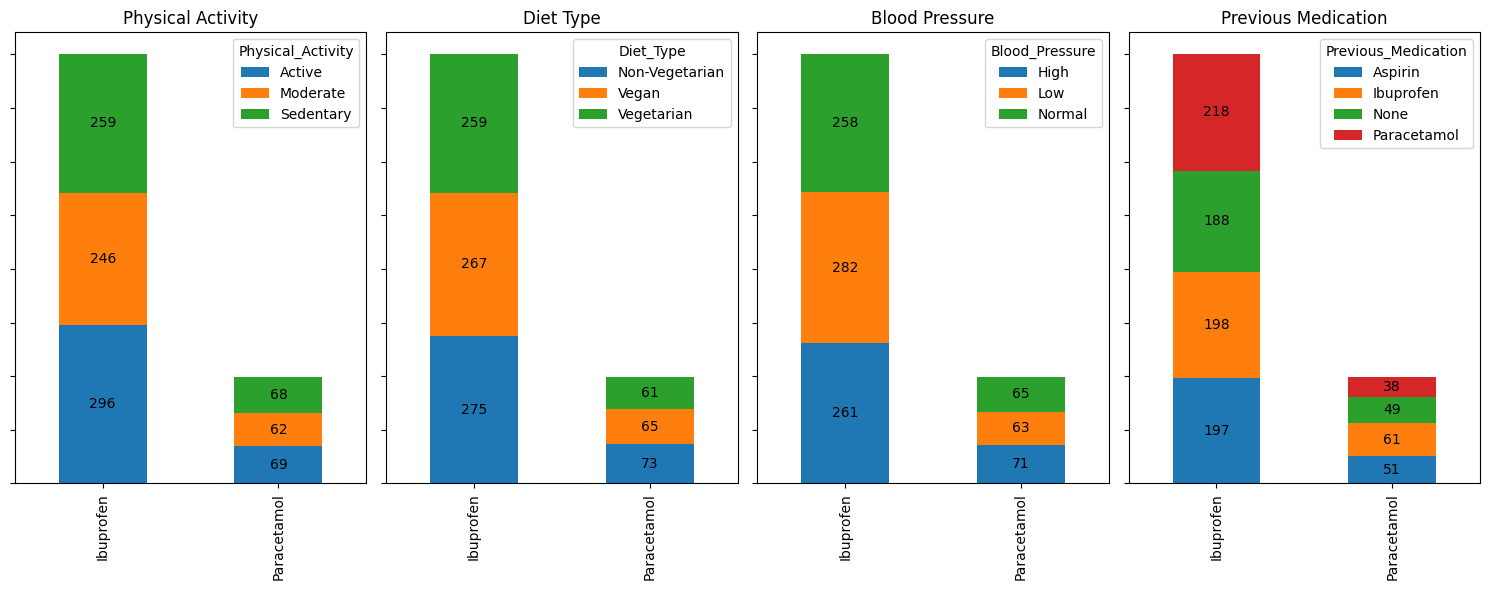

In [3]:
diagnoses = ["Normal", "Mild Fever", "High Fever"]

for d in diagnoses:
    display(HTML("<h2>Prescriptions for patients with {} status</h2>".format(d)))
    index = 0

    temp_df = df[df[cats[-2]] == d]
    for _ in range(3):
        fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
        for i in range(4):
            df.groupby(cats[-1])[cats[index]].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[i])
            bar_labels(axes[i], 0, "center")
            axes[i].set_title(cats[index].replace("_", ' '))
            index += 1
        plt.tight_layout()
        plt.show()

# Numerical attributes distribution

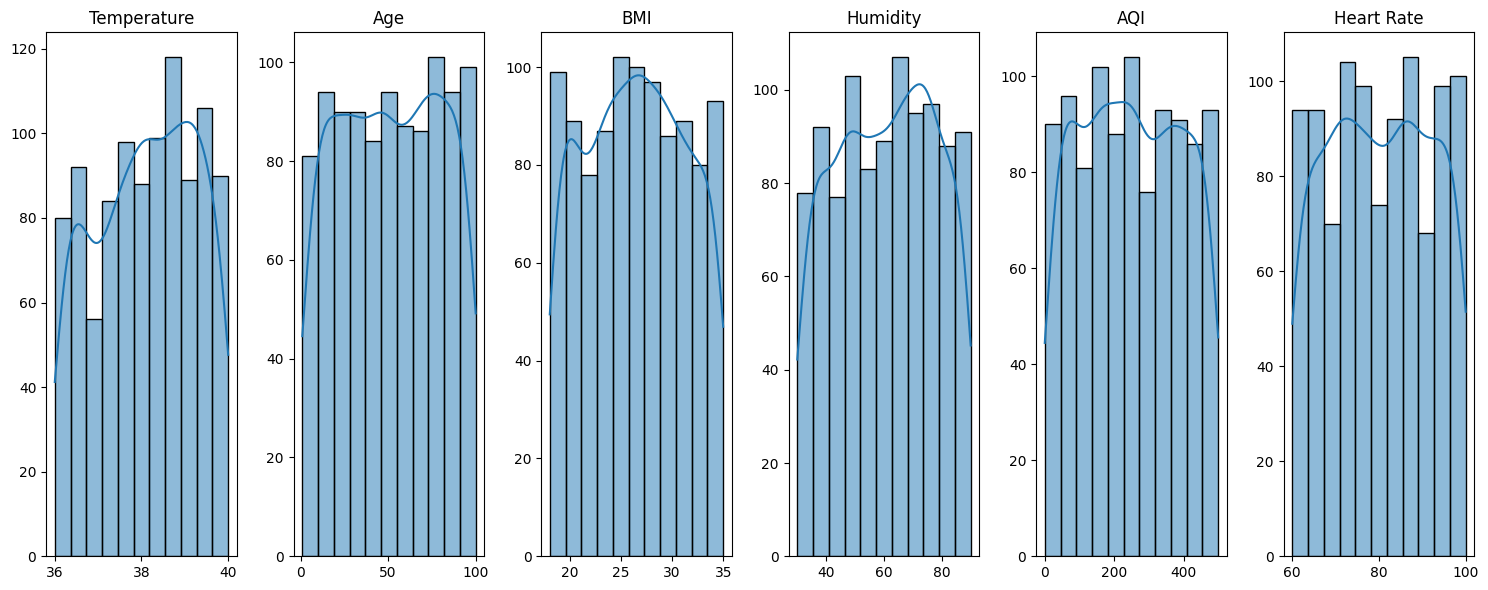

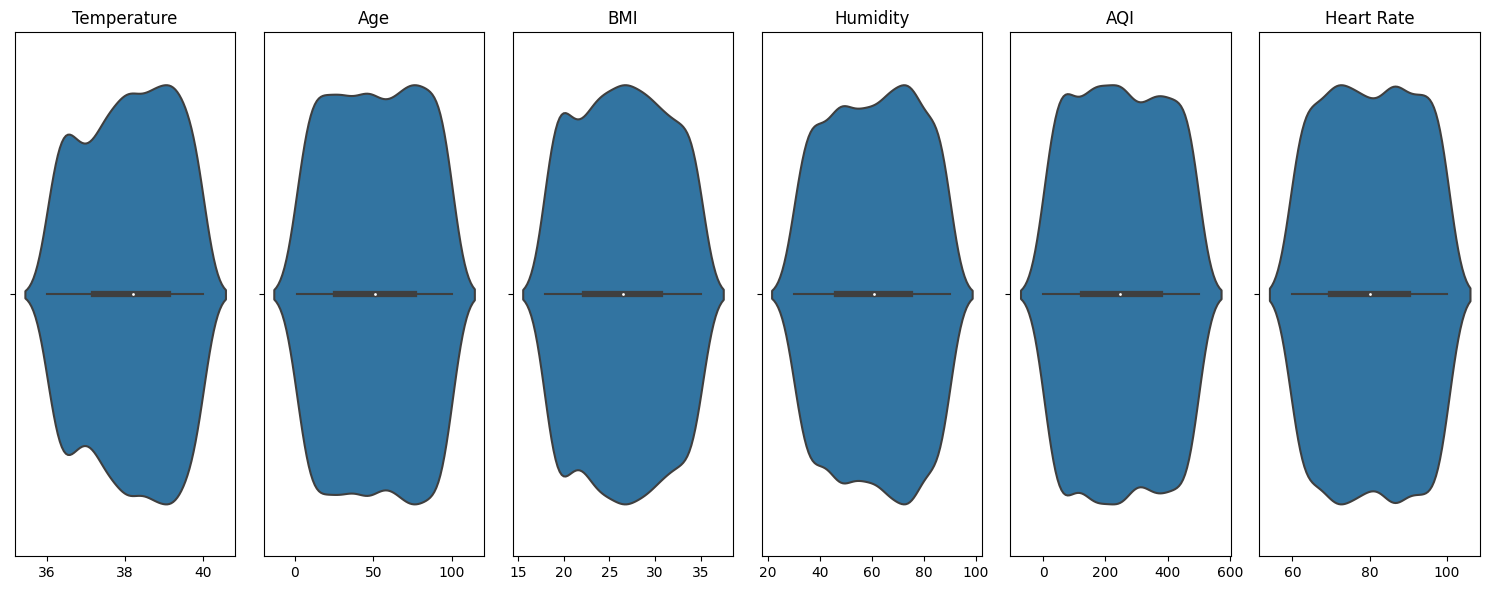

In [4]:
fig, axes = plt.subplots(ncols=6, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.histplot(df, x=j, kde=True, ax=axes[i])
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(ncols=6, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.violinplot(df, x=j, ax=axes[i])
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

# Numerical attributes influcence on fever severity

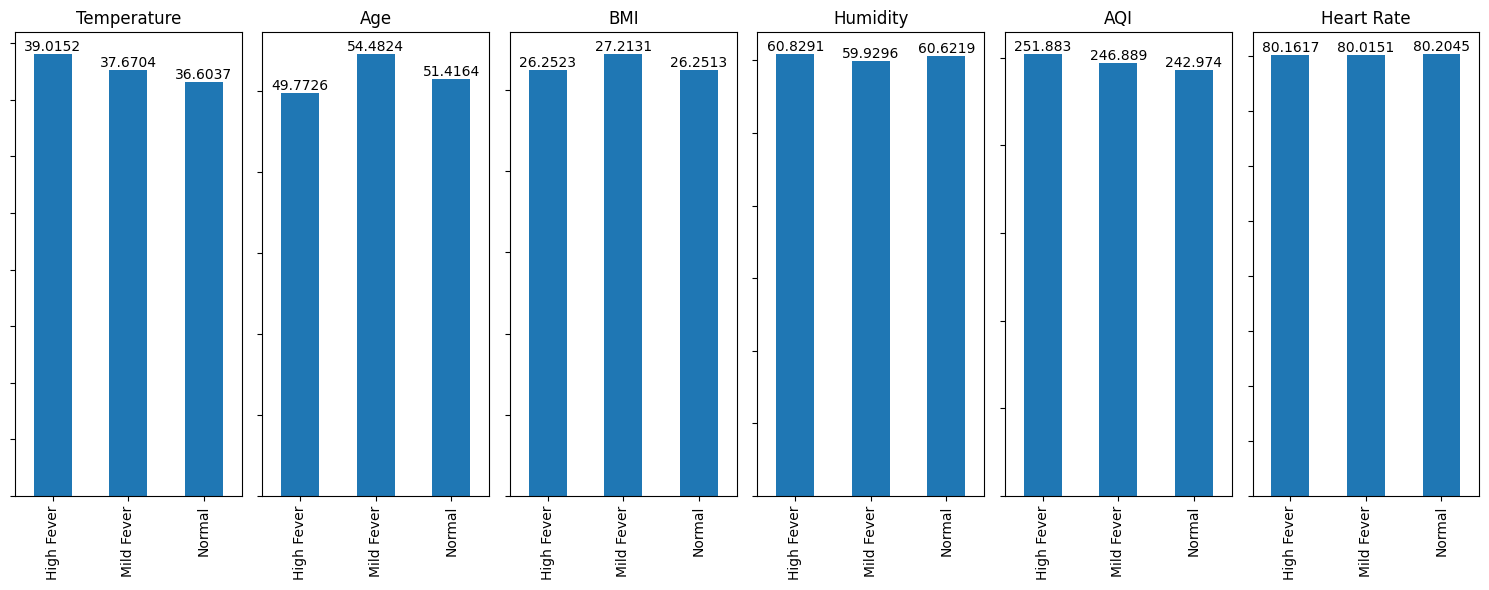

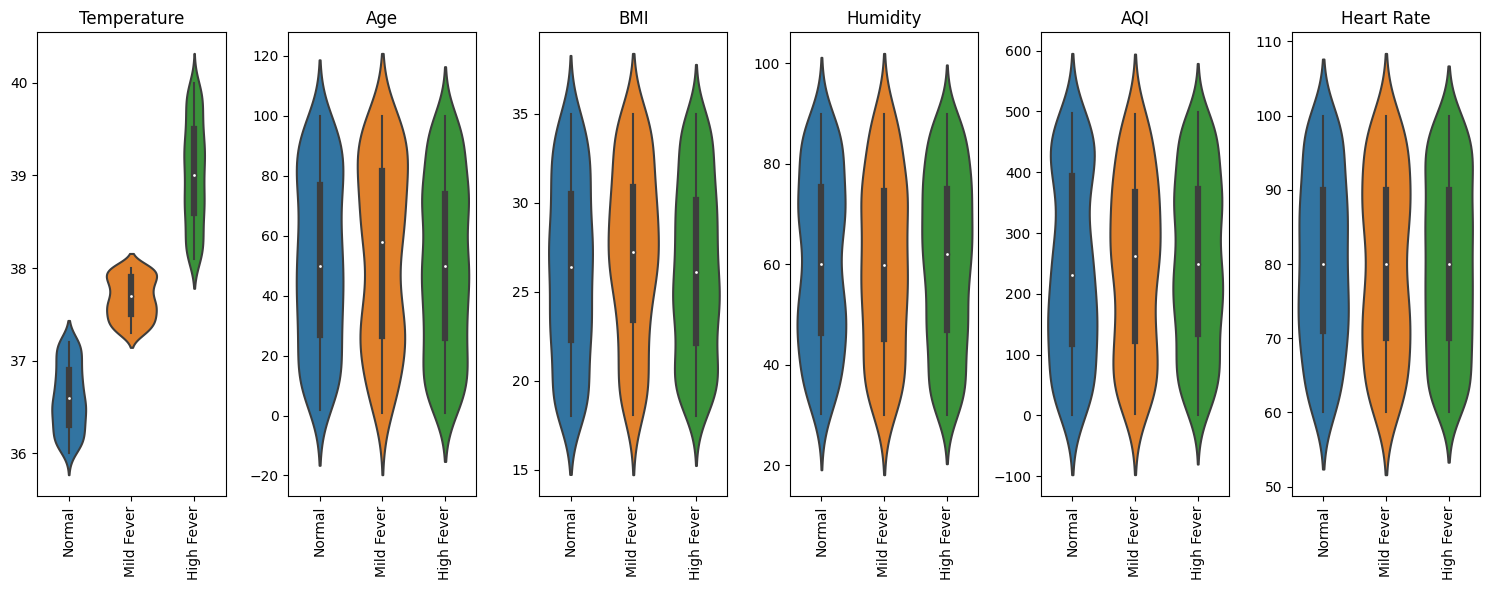

In [5]:
grouped = df.groupby(cats[-2])

fig, axes = plt.subplots(ncols=6, figsize=(15, 6))

for i, j in enumerate(nums):
    grouped[j].mean().plot(kind="bar", ax=axes[i])
    bar_labels(axes[i])
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(ncols=6, figsize=(15, 6))

for i, j in enumerate(nums):
    sns.violinplot(df, x=cats[-2], y=j, ax=axes[i])
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(j.replace('_', ' '))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

# Prescrpitons for patients with different severities

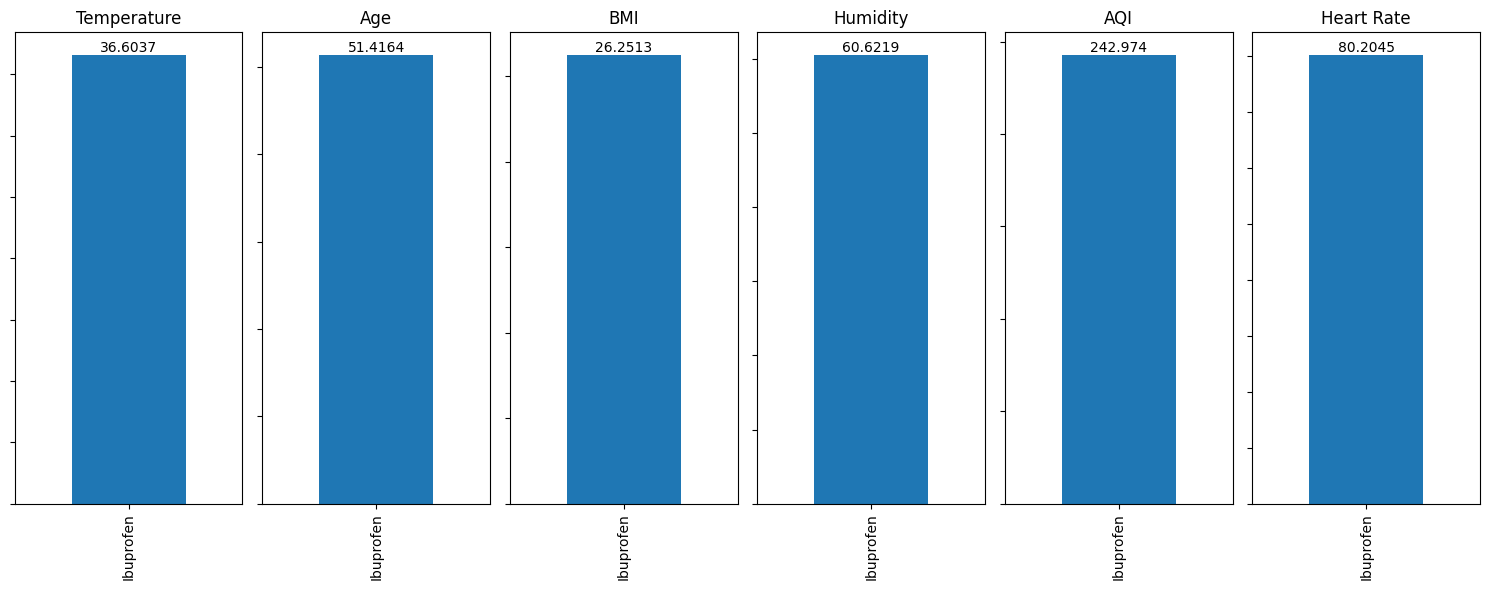

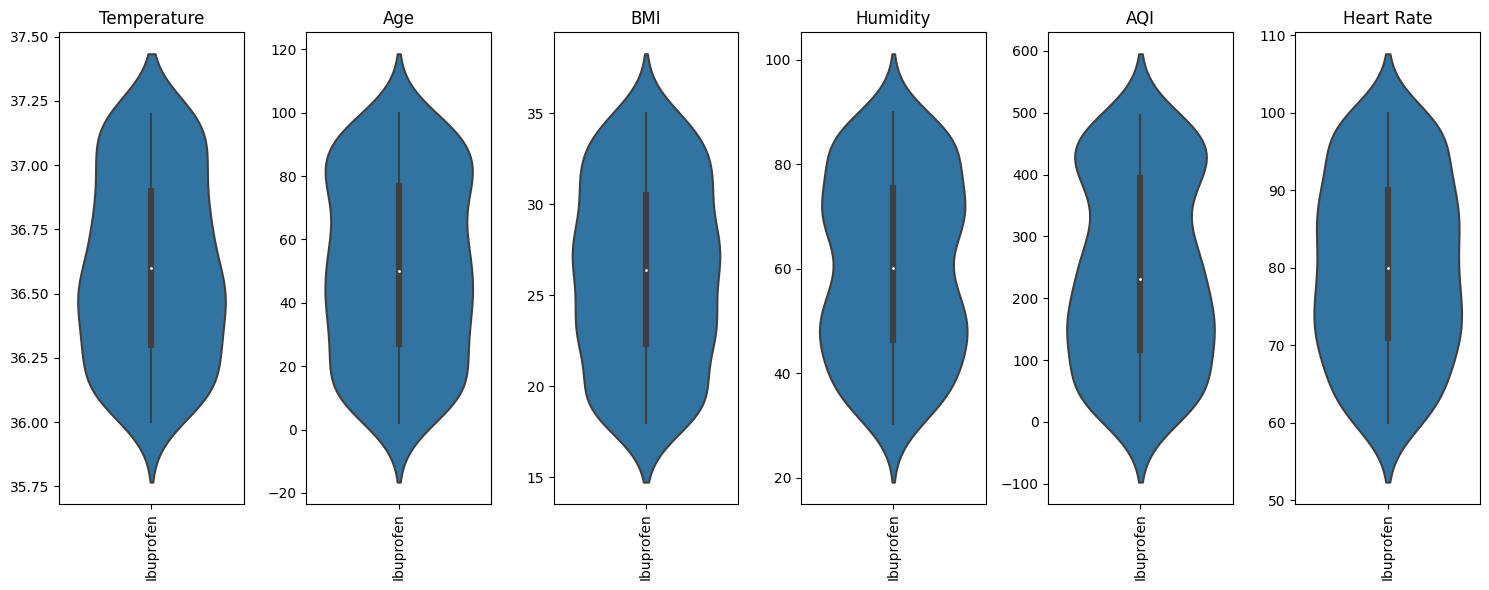

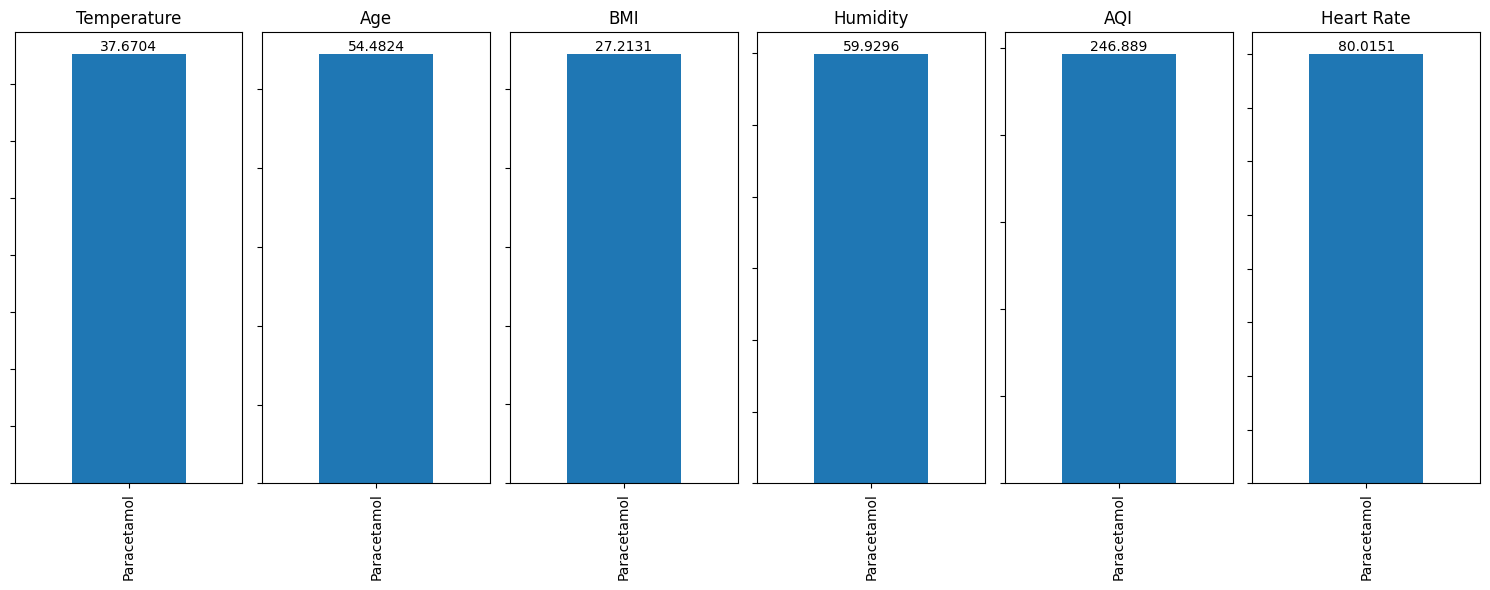

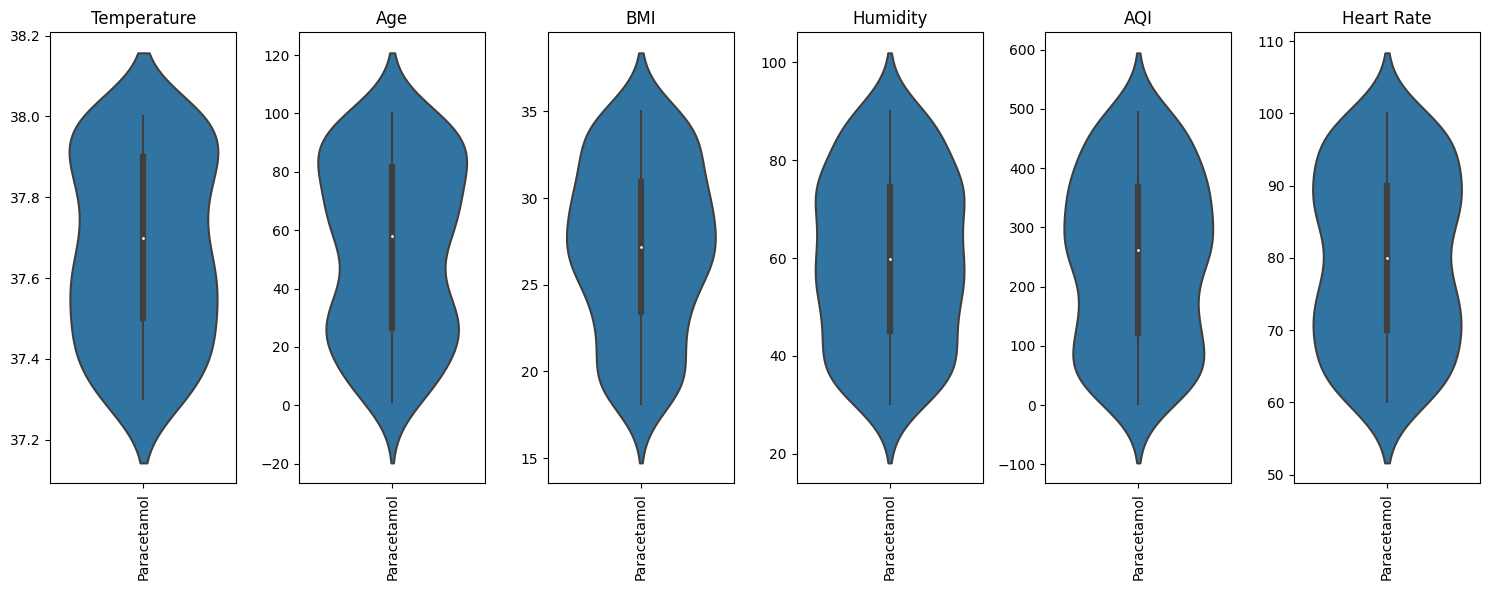

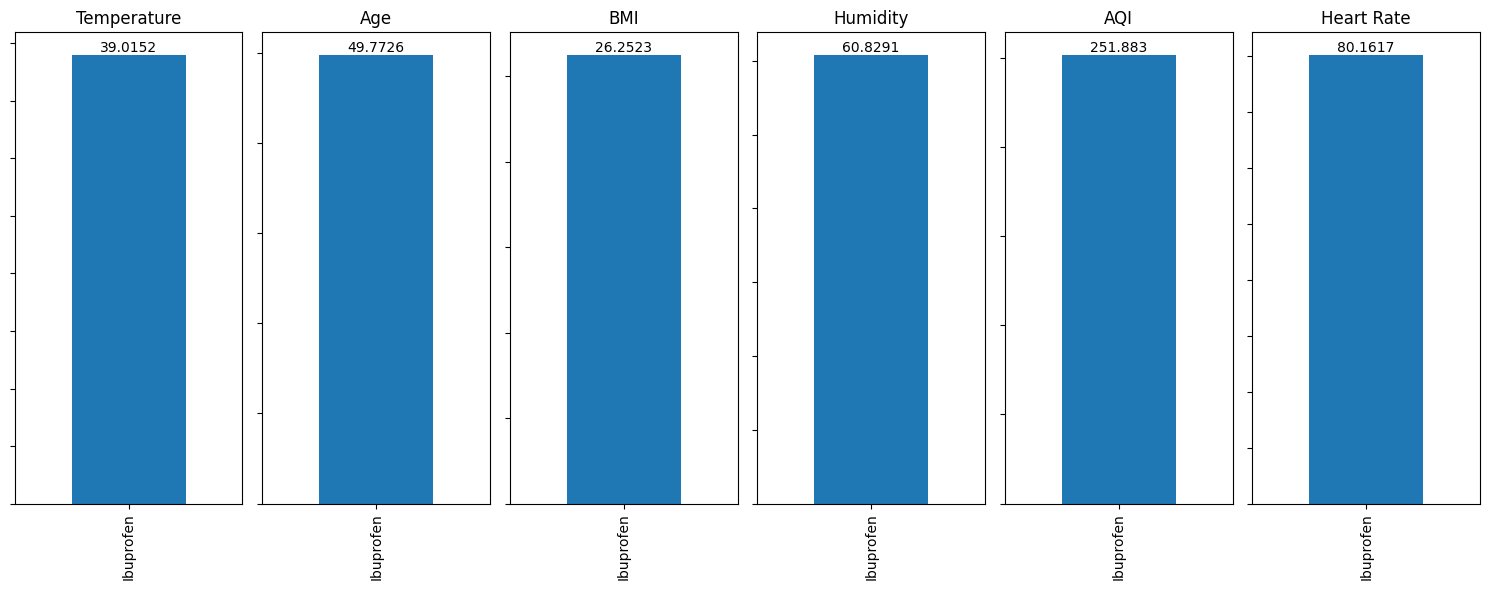

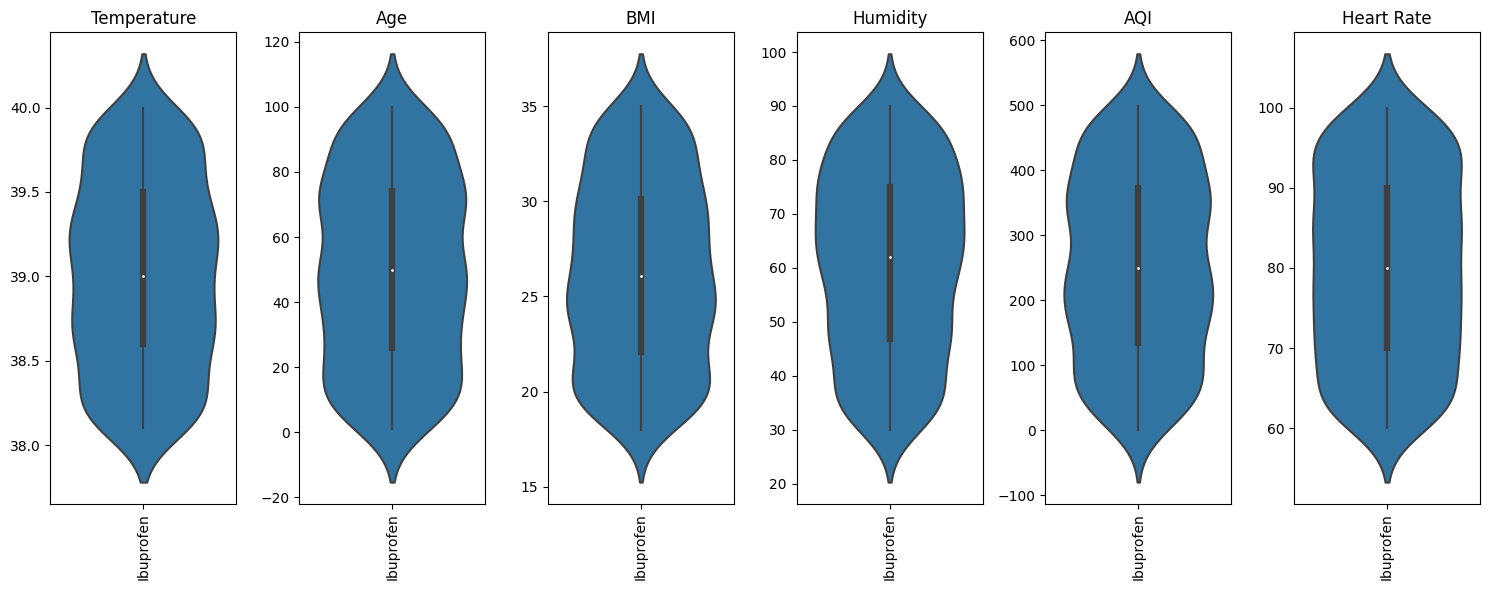

In [6]:
for d in diagnoses:
    display(HTML("<h2>Numerical attributes for patients with {} and influcence on prescrpiption</h2>".format(d)))
    temp_df = df[df[cats[-2]] == d]
    grouped = temp_df.groupby(cats[-1])
    
    fig, axes = plt.subplots(ncols=6, figsize=(15, 6))
    
    for i, j in enumerate(nums):
        grouped[j].mean().plot(kind="bar", ax=axes[i])
        bar_labels(axes[i])
        axes[i].set_title(j.replace('_', ' '))
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(ncols=6, figsize=(15, 6))
    
    for i, j in enumerate(nums):
        sns.violinplot(temp_df, x=cats[-1], y=j, ax=axes[i])
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        axes[i].set_title(j.replace('_', ' '))
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.show()

# Classification performance for fever severity detection

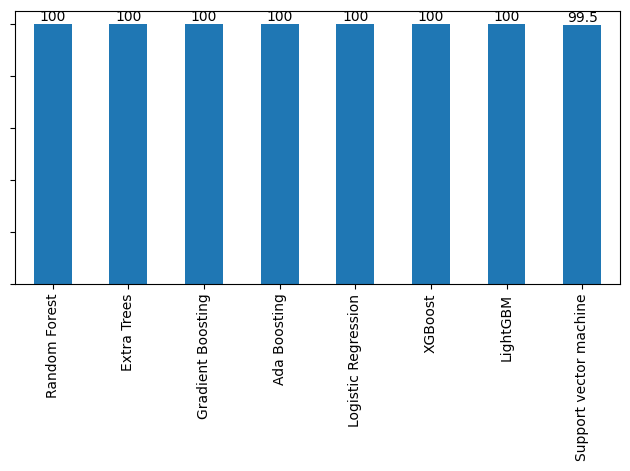

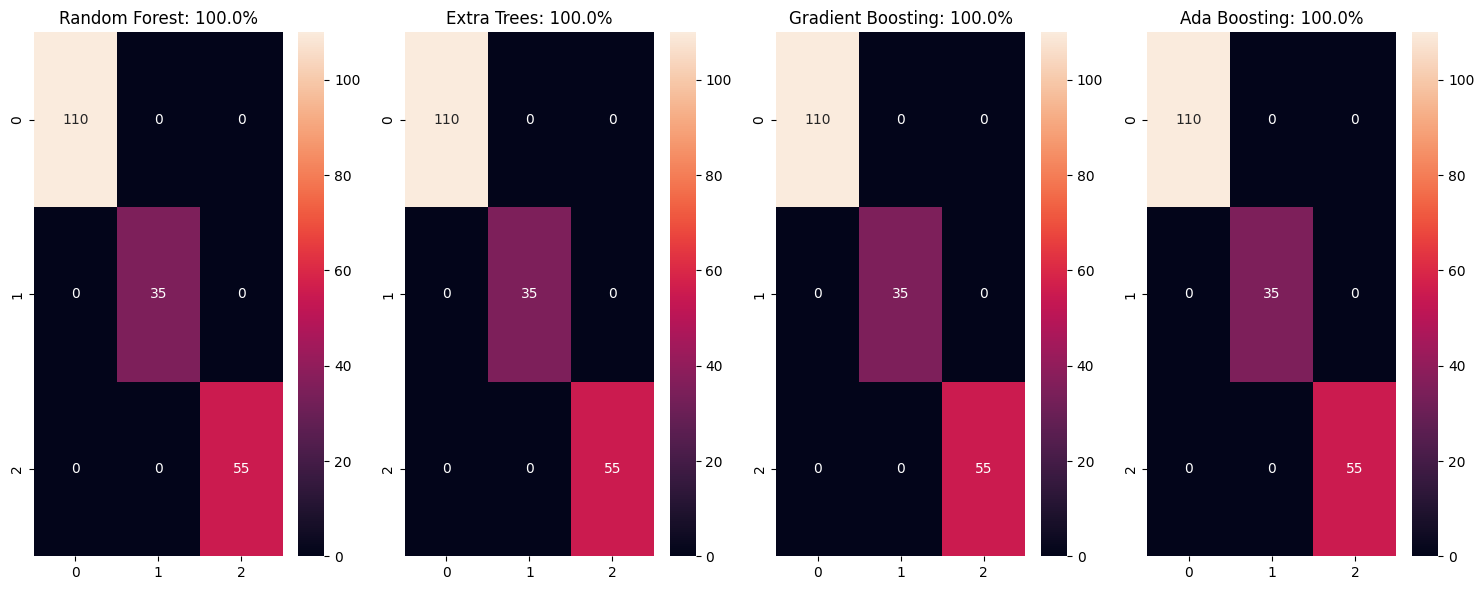

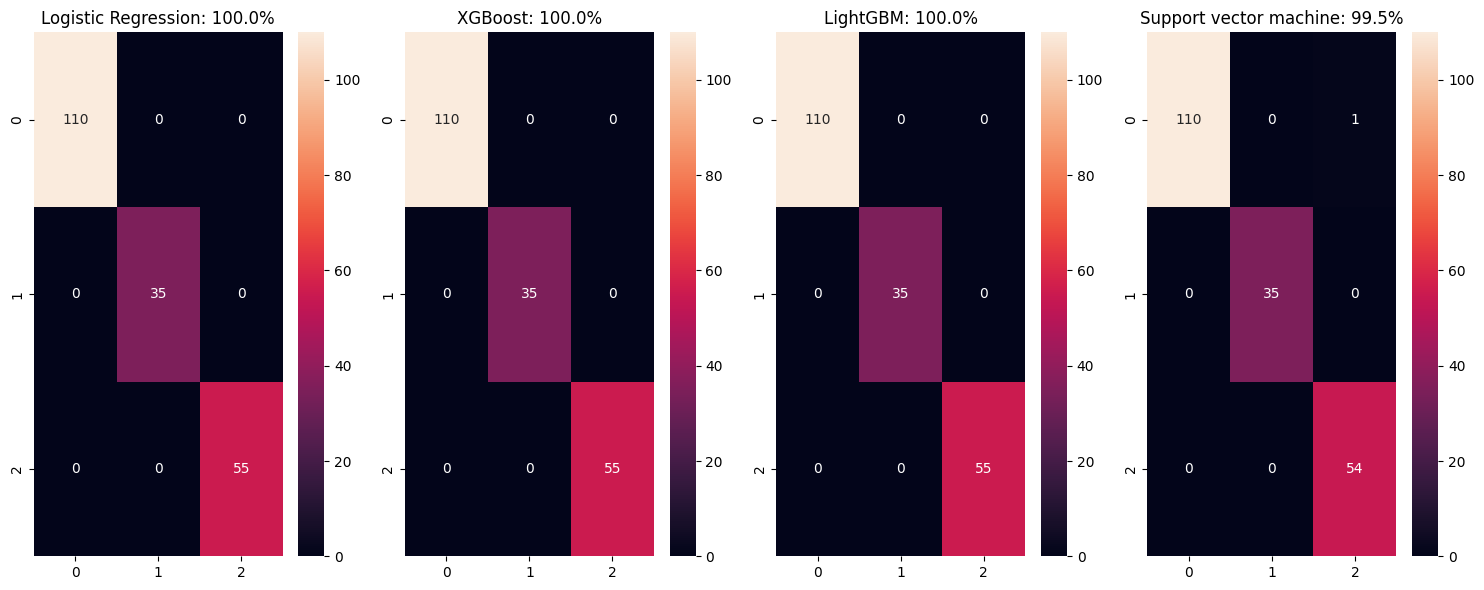

******************************
Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        55

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200




******************************
Extra Trees
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        55

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200




******************************
Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1

In [7]:
for i in cats:
    df[i] = LabelEncoder().fit_transform(df[i].values)

scaler = MinMaxScaler()

selected_vals = df.columns[:-2].tolist()
selected_vals += [df.columns[-1]]

x = df.loc[:, selected_vals].values
y = df.iloc[:, -2].values

x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

x_train, y_train = SMOTE().fit_resample(x_train, y_train)

training()